In [65]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans, AgglomerativeClustering
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.cluster import hierarchy
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from scipy.spatial import distance
from sklearn.decomposition import PCA
import numpy as np
#from scipy.spatial import ConvexHull
from matplotlib.patches import Ellipse

In [66]:
df = pd.read_csv('adjacency_matrix_confidence.csv', index_col='Id')
df_cluster = df.copy()
df_cluster.head()

,T1566,T1047,T1053,T1059,T1106,T1204,T1543,T1547,T1027,T1036,...,T1005,T1056,T1113,T1560,T1071,T1090,T1105,T1132,T1573,T1041
Id,,,,,,,,,,,,,,,,,,,,,
T1566,0.0,0,0,0.820144,0,0.935252,0,0.52518,0.719424,0.532374,...,0.0,0.0,0.0,0,0.553957,0,0.733813,0,0,0
T1047,0.0,0,0,0.834951,0,0.000000,0,0.00000,0.708738,0.000000,...,0.0,0.0,0.0,0,0.000000,0,0.000000,0,0,0
T1053,0.0,0,0,0.816993,0,0.000000,0,0.00000,0.718954,0.529412,...,0.0,0.0,0.0,0,0.666667,0,0.705882,0,0,0
T1059,0.0,0,0,0.000000,0,0.000000,0,0.00000,0.621076,0.000000,...,0.0,0.0,0.0,0,0.551570,0,0.670404,0,0,0
T1106,0.0,0,0,0.733728,0,0.000000,0,0.00000,0.775148,0.538462,...,0.0,0.0,0.0,0,0.627219,0,0.715976,0,0,0


In [67]:
df.describe()

,T1566,T1047,T1053,T1059,T1106,T1204,T1543,T1547,T1027,T1036,...,T1005,T1056,T1113,T1560,T1071,T1090,T1105,T1132,T1573,T1041
count,35.000000,35.0,35.0,35.000000,35.0,35.000000,35.0,35.000000,35.000000,35.000000,...,35.000000,35.000000,35.000000,35.0,35.000000,35.0,35.000000,35.0,35.0,35.0
mean,0.022375,0.0,0.0,0.698961,0.0,0.026721,0.0,0.092491,0.611153,0.061212,...,0.015292,0.016552,0.016000,0.0,0.522860,0.0,0.610890,0.0,0.0,0.0
std,0.132374,0.0,0.0,0.179955,0.0,0.158086,0.0,0.206578,0.230162,0.172903,...,0.090467,0.097921,0.094657,0.0,0.248194,0.0,0.256091,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0
25%,0.000000,0.0,0.0,0.705293,0.0,0.000000,0.0,0.000000,0.624824,0.000000,...,0.000000,0.000000,0.000000,0.0,0.560666,0.0,0.665879,0.0,0.0,0.0
50%,0.000000,0.0,0.0,0.730000,0.0,0.000000,0.0,0.000000,0.672727,0.000000,...,0.000000,0.000000,0.000000,0.0,0.606897,0.0,0.706806,0.0,0.0,0.0
75%,0.000000,0.0,0.0,0.756076,0.0,0.000000,0.0,0.000000,0.721158,0.000000,...,0.000000,0.000000,0.000000,0.0,0.637459,0.0,0.730877,0.0,0.0,0.0
max,0.783133,0.0,0.0,0.834951,0.0,0.935252,0.0,0.588235,0.826087,0.542169,...,0.535211,0.579310,0.560000,0.0,0.818182,0.0,0.793478,0.0,0.0,0.0


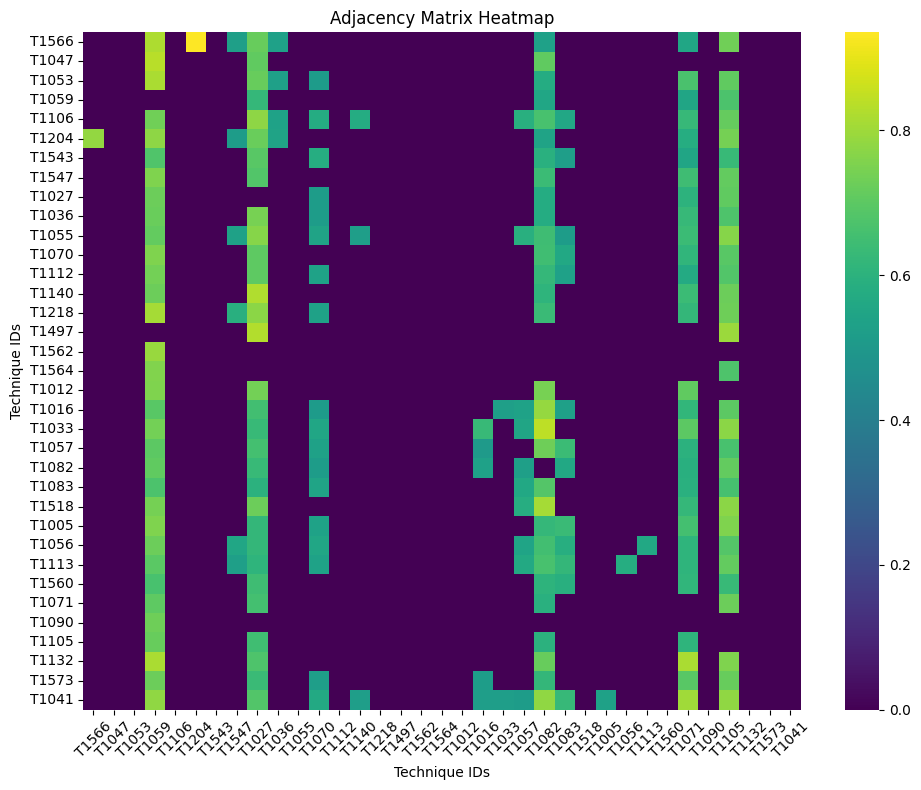

In [68]:
plt.figure(figsize=(10, 8))
sns.heatmap(df, cmap='viridis')  # Adjust the colormap as needed
plt.title('Adjacency Matrix Heatmap')
plt.xlabel('Technique IDs')
plt.ylabel('Technique IDs')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [69]:
sorted_values = sorted(df.values.flatten(), reverse=True)
top_10_values = sorted_values[:10]
chokepoints = df[df.isin(top_10_values)]
for row_label, row in chokepoints.iterrows():
    for col_label, value in row.items():
        if not pd.isnull(value):  # Check if the value is not NaN (i.e., among the top 10 values)
            print(f"Edge: {row_label} - {col_label}, Count: {value}")

Edge: T1566 - T1059, Count: 0.820143885
Edge: T1566 - T1204, Count: 0.935251799
Edge: T1047 - T1059, Count: 0.834951456
Edge: T1053 - T1059, Count: 0.816993464
Edge: T1140 - T1027, Count: 0.823275862
Edge: T1497 - T1027, Count: 0.826086957
Edge: T1033 - T1082, Count: 0.842639594
Edge: T1518 - T1082, Count: 0.811023622
Edge: T1132 - T1059, Count: 0.818181818
Edge: T1132 - T1071, Count: 0.818181818


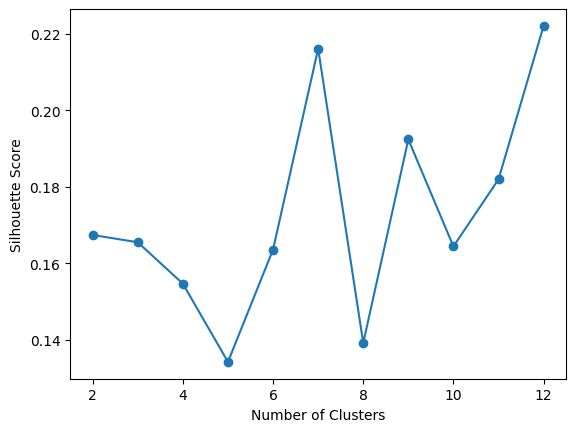

In [70]:
# Apply K-means clustering
k_values = [2,3,4,5,6,7,8,9,10,11, 12]
silhouette_scores = []
for k in k_values:
    model = KMeans(n_clusters=k)
    df_cluster['kmeans'] = model.fit_predict(df)
    silhouette_avg = silhouette_score(df, df_cluster['kmeans'])
    silhouette_scores.append(silhouette_avg)

plt.plot(k_values, silhouette_scores, marker = 'o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()


Silhouette Score: 0.36355659128103773
Average Distance Within Clusters: 0.6987921561425148
Average Distance Between Clusters: 0.7926499012671261
Entropy: 0.9517626756348311


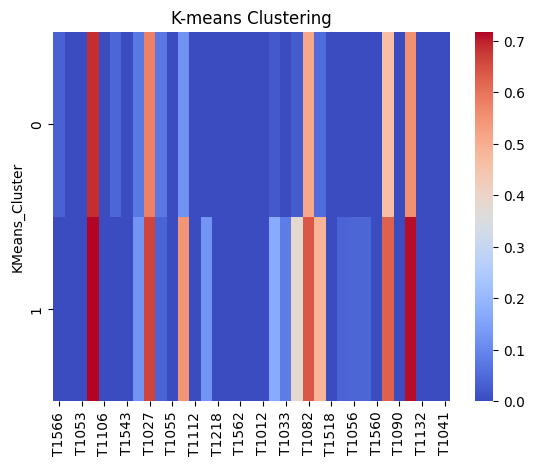

In [71]:
kmeans = KMeans(n_clusters=2, random_state=42)  # You can choose the number of clusters
kmeans.fit(df)
df['KMeans_Cluster'] = kmeans.labels_

silhouette_kmeans = silhouette_score(df, kmeans.labels_)
print("Silhouette Score:", silhouette_kmeans)

# Calculate average distance within clusters
cluster_centers = kmeans.cluster_centers_
cluster_labels = kmeans.labels_
n_clusters = len(np.unique(cluster_labels))

avg_distance_within_clusters = 0
for i in range(n_clusters):
    cluster_points = df[df['KMeans_Cluster'] == i].drop(columns='KMeans_Cluster').values
    centroid = cluster_centers[i]
    distance_within_cluster = np.linalg.norm(cluster_points - centroid, axis=1).mean()
    avg_distance_within_clusters += distance_within_cluster
avg_distance_within_clusters /= n_clusters
print("Average Distance Within Clusters:", avg_distance_within_clusters)

# Calculate average distance between clusters
avg_distance_between_clusters = 0
for i in range(n_clusters):
    for j in range(i+1, n_clusters):
        distance_between_clusters = np.linalg.norm(cluster_centers[i] - cluster_centers[j])
        avg_distance_between_clusters += distance_between_clusters
avg_distance_between_clusters /= (n_clusters * (n_clusters - 1) / 2)
print("Average Distance Between Clusters:", avg_distance_between_clusters)

# Calculate entropy
cluster_counts = df['KMeans_Cluster'].value_counts(normalize=True)
entropy = -np.sum(cluster_counts * np.log2(cluster_counts))
print("Entropy:", entropy)

# Visualize the clusters using a heatmap
sns.heatmap(df.groupby('KMeans_Cluster').mean(), cmap='coolwarm')
plt.title('K-means Clustering')
plt.show()

In [72]:
# Step 1: Aggregate data by cluster
cluster_summary = df.groupby('KMeans_Cluster').mean()

# Step 1: Aggregate data by cluster
cluster_summary = df.drop('KMeans_Cluster', axis=1).groupby(df['KMeans_Cluster']).mean()

# Step 2: For each cluster, sort the techniques by their prevalence
for cluster_id, cluster_data in cluster_summary.iterrows():
    sorted_techniques = cluster_data.sort_values(ascending=False)
    
    # Step 3: Print the cluster summary
    print(f"Cluster {cluster_id}:")
    for technique, prevalence in sorted_techniques.items():
        print(f"  {technique}: {prevalence:.2f}")
    print("\n")



Cluster 0:
  T1059: 0.69
  T1027: 0.58
  T1105: 0.55
  T1082: 0.51
  T1071: 0.46
  T1070: 0.12
  T1547: 0.07
  T1036: 0.07
  T1083: 0.05
  T1204: 0.04
  T1566: 0.04
  T1057: 0.03
  T1016: 0.02
  T1132: 0.00
  T1560: 0.00
  T1113: 0.00
  T1056: 0.00
  T1005: 0.00
  T1518: 0.00
  T1573: 0.00
  T1090: 0.00
  T1564: 0.00
  T1033: 0.00
  T1012: 0.00
  T1047: 0.00
  T1562: 0.00
  T1497: 0.00
  T1218: 0.00
  T1140: 0.00
  T1112: 0.00
  T1055: 0.00
  T1543: 0.00
  T1106: 0.00
  T1053: 0.00
  T1041: 0.00


Cluster 1:
  T1059: 0.72
  T1105: 0.71
  T1027: 0.66
  T1082: 0.64
  T1071: 0.63
  T1070: 0.54
  T1083: 0.49
  T1057: 0.38
  T1016: 0.17
  T1140: 0.12
  T1547: 0.12
  T1033: 0.08
  T1056: 0.04
  T1113: 0.04
  T1036: 0.04
  T1005: 0.04
  T1090: 0.00
  T1132: 0.00
  T1560: 0.00
  T1518: 0.00
  T1573: 0.00
  T1566: 0.00
  T1564: 0.00
  T1012: 0.00
  T1047: 0.00
  T1562: 0.00
  T1497: 0.00
  T1218: 0.00
  T1112: 0.00
  T1055: 0.00
  T1543: 0.00
  T1204: 0.00
  T1106: 0.00
  T1053: 0.00
  T1041: 0

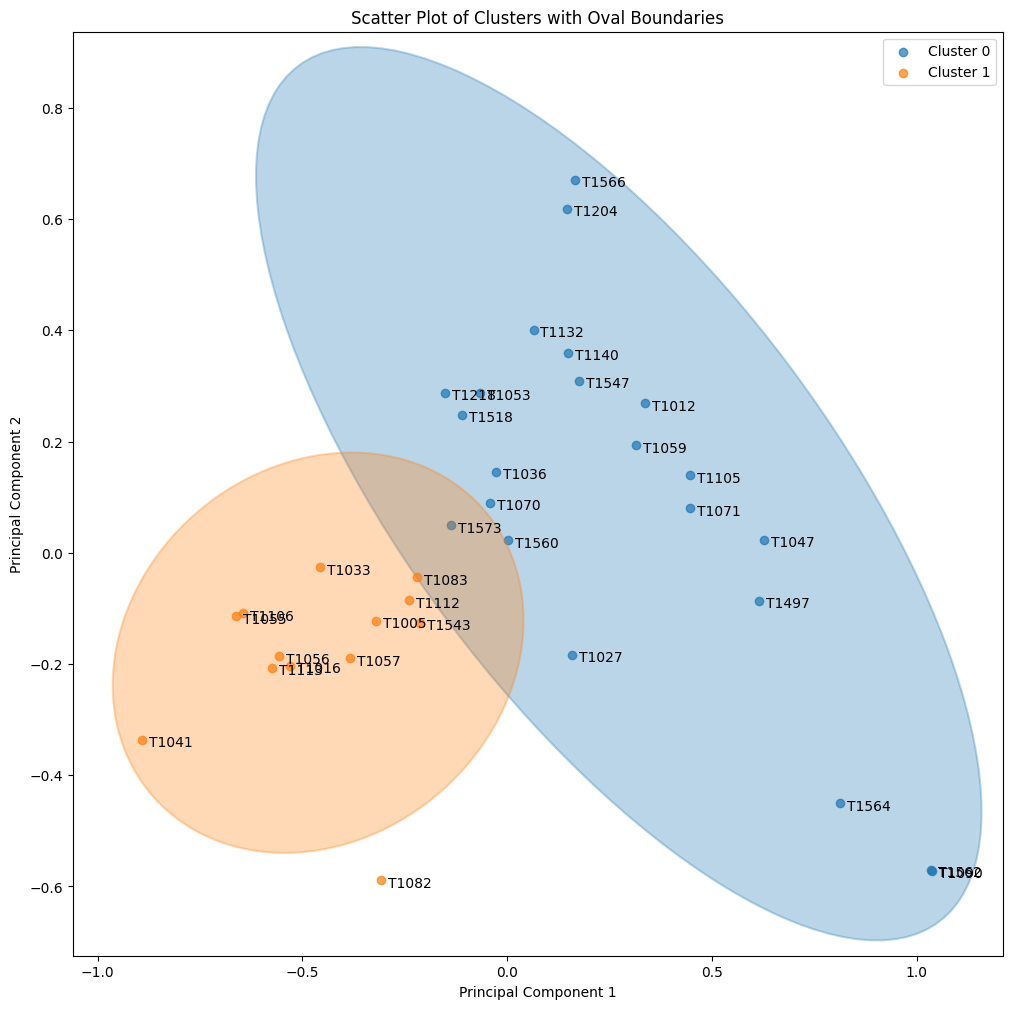

In [73]:
# Perform PCA if necessary
pca = PCA(n_components=2)
principal_components = pca.fit_transform(df.drop('KMeans_Cluster', axis=1))
plt.figure(figsize=(12, 12))
handles, labels = [], []
# Plot each cluster with oval boundaries
for cluster_id in df['KMeans_Cluster'].unique():
    cluster_data = principal_components[df['KMeans_Cluster'] == cluster_id]
    
    # Skip clusters with fewer than three points
    if len(cluster_data) < 3:
        continue
    
    # Plot cluster points and annotate
    cluster_indices = df[df['KMeans_Cluster'] == cluster_id].index
    for point, index in zip(cluster_data, cluster_indices):
        plt.annotate(index, point, xytext=(5, -5), textcoords='offset points')
    scatter = plt.scatter(cluster_data[:, 0], cluster_data[:, 1], label=f'Cluster {cluster_id}', alpha=0.7)
    
    
    # Compute mean and covariance matrix for the cluster
    mean = np.mean(cluster_data, axis=0)
    cov_matrix = np.cov(cluster_data.T)
    
    # Compute ellipse parameters
    eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)
    angle = np.degrees(np.arctan2(*eigenvectors[:, 0][::-1]))
    width, height = 2 * np.sqrt(5.991 * eigenvalues)
    
    # Create ellipse
    ellipse = Ellipse(xy=mean, width=width, height=height, angle=angle, edgecolor=f'C{cluster_id}', facecolor=f'C{cluster_id}', alpha=0.3, linewidth=1.5)
    
    # Plot ellipse
    plt.gca().add_patch(ellipse)

    # Update handles and labels for legend if not already in
    if f'Cluster {cluster_id}' not in labels:
        handles.append(scatter)
        labels.append(f'Cluster {cluster_id}')

# Add legend without repetitions
plt.legend(handles, labels)

# Add labels and title
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Scatter Plot of Clusters with Oval Boundaries')

# Show plot
plt.show()
df = df.drop('KMeans_Cluster', axis=1)


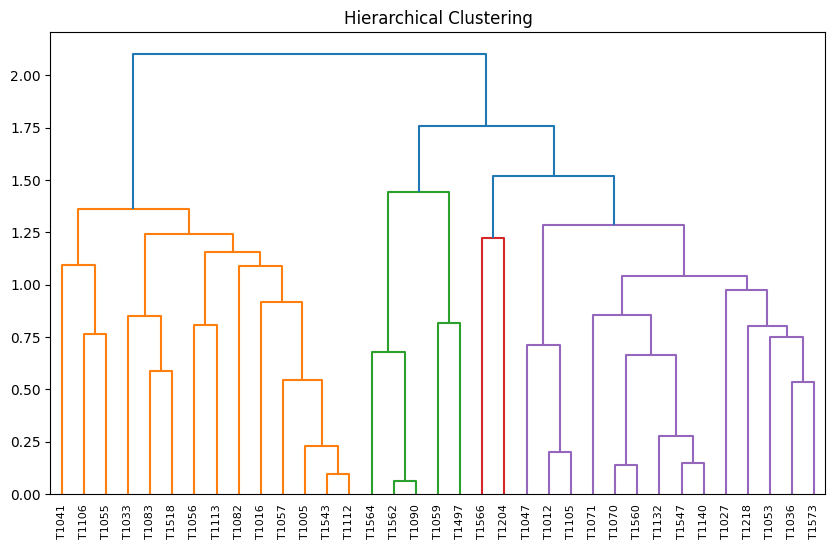

In [74]:
# Apply hierarchical clustering
linkage = hierarchy.linkage(df, method='complete', metric='euclidean')

# Visualize the clusters using a dendrogram
plt.figure(figsize=(10, 6))
dendrogram = hierarchy.dendrogram(linkage, labels=df.index, leaf_rotation=90)
plt.title('Hierarchical Clustering')
plt.show()

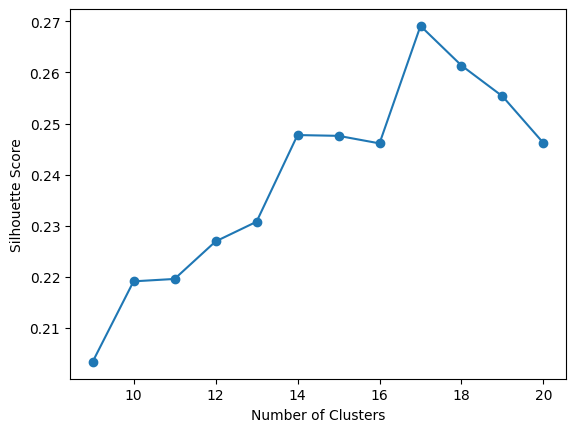

In [75]:
k_values = [9,10,11,12,13,14,15,16,17,18,19,20]
silhouette_scores = []
for k in k_values:
    model = AgglomerativeClustering(n_clusters=k)
    df_cluster['agg'] = model.fit_predict(df)
    silhouette_avg = silhouette_score(df, df_cluster['agg'])
    silhouette_scores.append(silhouette_avg)

plt.plot(k_values, silhouette_scores, marker = 'o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

In [76]:
# Perform Agglomerative Clustering
agg = AgglomerativeClustering(n_clusters=17)
agg_labels = agg.fit_predict(df)
df['Agg_Cluster'] = agg_labels
def average_distance_within_clusters(X, labels):
    total_distance = 0
    cluster_counts = np.bincount(labels)
    for cluster_id in np.unique(labels):
        cluster_indices = np.where(labels == cluster_id)[0]
        cluster_points = X[cluster_indices]
        centroid = np.mean(cluster_points, axis=0)
        total_distance += np.sum(distance.cdist(cluster_points, [centroid]))
    return total_distance / len(X)

# Calculate average distance between clusters
def average_distance_between_clusters(X, labels):
    centroids = []
    for cluster_id in np.unique(labels):
        cluster_indices = np.where(labels == cluster_id)[0]
        cluster_points = X[cluster_indices]
        centroids.append(np.mean(cluster_points, axis=0))
    return np.mean(distance.pdist(centroids))

# Calculate entropy
def entropy(labels):
    unique_labels, counts = np.unique(labels, return_counts=True)
    probabilities = counts / len(labels)
    return -np.sum(probabilities * np.log(probabilities))

# Assuming df contains your data and agg_labels contains the cluster labels

# Calculate silhouette score
silhouette_agg = silhouette_score(df, agg_labels)

# Calculate average distance within clusters
avg_distance_within_clusters = average_distance_within_clusters(df.values, agg_labels)

# Calculate average distance between clusters
avg_distance_between_clusters = average_distance_between_clusters(df.values, agg_labels)

# Calculate entropy
entropy_score = entropy(agg_labels)

print("Silhouette Score:", silhouette_agg)
print("Average Distance Within Clusters:", avg_distance_within_clusters)
print("Average Distance Between Clusters:", avg_distance_between_clusters)
print("Entropy:", entropy_score)

Silhouette Score: 0.5385589767320264
Average Distance Within Clusters: 0.2422548107991342
Average Distance Between Clusters: 6.209104012030759
Entropy: 2.7183300142410864


In [77]:
# Step 1: Aggregate data by cluster
cluster_summary = df.groupby('Agg_Cluster').mean()

# Step 1: Aggregate data by cluster
cluster_summary = df.drop('Agg_Cluster', axis=1).groupby(df['Agg_Cluster']).mean()

# Step 2: For each cluster, sort the techniques by their prevalence
for cluster_id, cluster_data in cluster_summary.iterrows():
    sorted_techniques = cluster_data.sort_values(ascending=False)
    
    # Step 3: Print the cluster summary
    print(f"Cluster {cluster_id}:")
    for technique, prevalence in sorted_techniques.items():
        print(f"  {technique}: {prevalence:.2f}")
    print("\n")


Cluster 0:
  T1105: 0.73
  T1027: 0.72
  T1082: 0.28
  T1071: 0.28
  T1566: 0.00
  T1005: 0.00
  T1033: 0.00
  T1057: 0.00
  T1083: 0.00
  T1518: 0.00
  T1113: 0.00
  T1056: 0.00
  T1012: 0.00
  T1560: 0.00
  T1090: 0.00
  T1132: 0.00
  T1573: 0.00
  T1016: 0.00
  T1564: 0.00
  T1047: 0.00
  T1562: 0.00
  T1497: 0.00
  T1218: 0.00
  T1140: 0.00
  T1112: 0.00
  T1070: 0.00
  T1055: 0.00
  T1036: 0.00
  T1547: 0.00
  T1543: 0.00
  T1204: 0.00
  T1106: 0.00
  T1059: 0.00
  T1053: 0.00
  T1041: 0.00


Cluster 1:
  T1082: 0.78
  T1105: 0.73
  T1059: 0.72
  T1027: 0.65
  T1071: 0.64
  T1057: 0.56
  T1070: 0.37
  T1016: 0.21
  T1566: 0.00
  T1005: 0.00
  T1083: 0.00
  T1518: 0.00
  T1560: 0.00
  T1056: 0.00
  T1113: 0.00
  T1090: 0.00
  T1132: 0.00
  T1573: 0.00
  T1033: 0.00
  T1564: 0.00
  T1012: 0.00
  T1047: 0.00
  T1562: 0.00
  T1497: 0.00
  T1218: 0.00
  T1140: 0.00
  T1112: 0.00
  T1055: 0.00
  T1036: 0.00
  T1547: 0.00
  T1543: 0.00
  T1204: 0.00
  T1106: 0.00
  T1053: 0.00
  T1041: 0

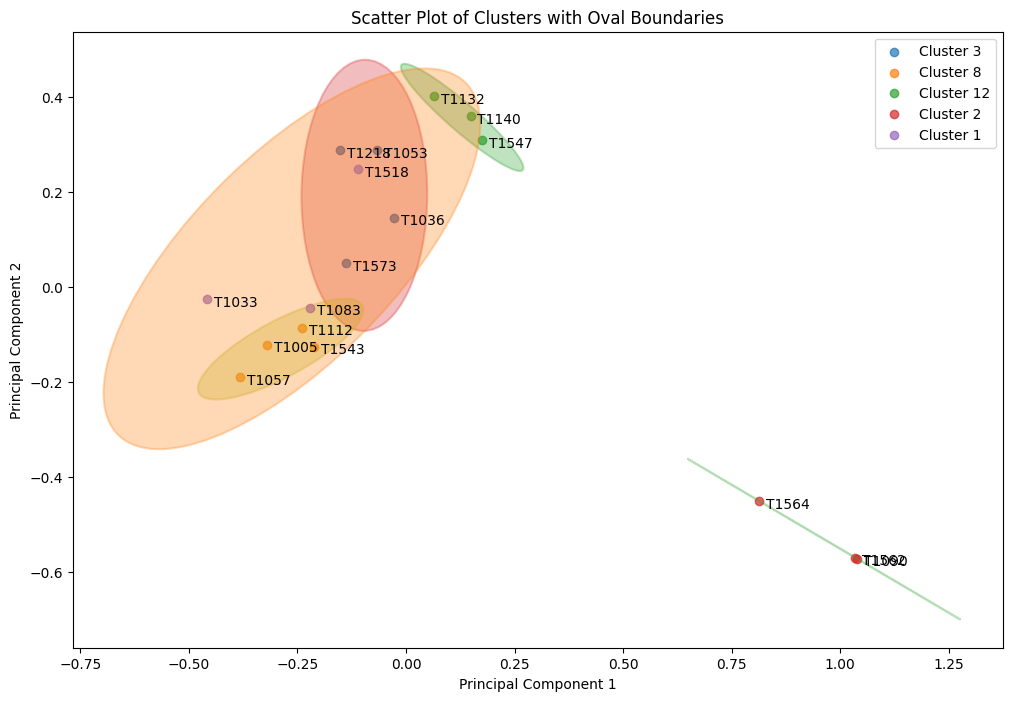

In [78]:
# Perform PCA if necessary
pca = PCA(n_components=2)
principal_components = pca.fit_transform(df.drop('Agg_Cluster', axis=1))
plt.figure(figsize=(12, 8))
handles, labels = [], []
# Plot each cluster with oval boundaries
for cluster_id in df['Agg_Cluster'].unique():
    cluster_data = principal_components[df['Agg_Cluster'] == cluster_id]
    
    # Skip clusters with fewer than three points
    if len(cluster_data) < 3:
        continue
    
    # Plot cluster points and annotate
    cluster_indices = df[df['Agg_Cluster'] == cluster_id].index
    for point, index in zip(cluster_data, cluster_indices):
        plt.annotate(index, point, xytext=(5, -5), textcoords='offset points')
    scatter = plt.scatter(cluster_data[:, 0], cluster_data[:, 1], label=f'Cluster {cluster_id}', alpha=0.7)
    
    
    # Compute mean and covariance matrix for the cluster
    mean = np.mean(cluster_data, axis=0)
    cov_matrix = np.cov(cluster_data.T)
    
    # Compute ellipse parameters
    eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)
    angle = np.degrees(np.arctan2(*eigenvectors[:, 0][::-1]))
    width, height = 2 * np.sqrt(5.991 * eigenvalues)
    
    # Create ellipse
    ellipse = Ellipse(xy=mean, width=width, height=height, angle=angle, edgecolor=f'C{cluster_id}', facecolor=f'C{cluster_id}', alpha=0.3, linewidth=1.5)
    
    # Plot ellipse
    plt.gca().add_patch(ellipse)

    # Update handles and labels for legend if not already in
    if f'Cluster {cluster_id}' not in labels:
        handles.append(scatter)
        labels.append(f'Cluster {cluster_id}')

# Add legend without repetitions
plt.legend(handles, labels)

# Add labels and title
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Scatter Plot of Clusters with Oval Boundaries')

# Show plot
plt.show()
df = df.drop('Agg_Cluster', axis=1)


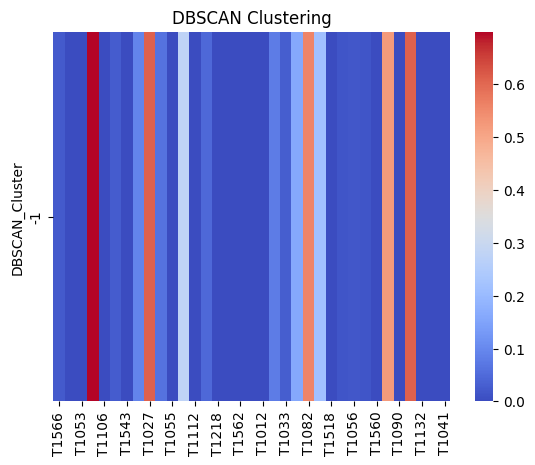

In [79]:
# Apply DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(df)
df['DBSCAN_Cluster'] = dbscan_labels
#silhouette_dbscan = silhouette_score(df, dbscan_labels[dbscan_labels != -1])
# Visualize the clusters using a heatmap
sns.heatmap(df.groupby('DBSCAN_Cluster').mean(), cmap='coolwarm')
plt.title('DBSCAN Clustering')
plt.show()
df = df.drop(columns='DBSCAN_Cluster')

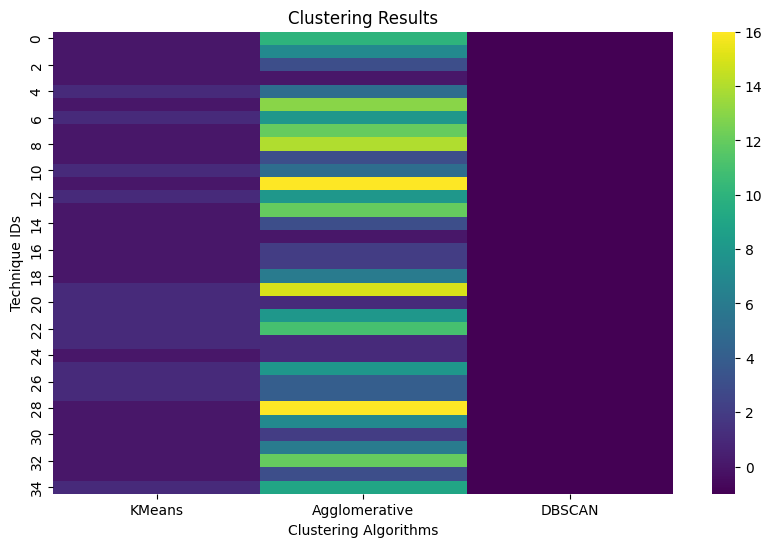

In [80]:
# Create a DataFrame with the clustering labels
clustered_df = pd.DataFrame({'KMeans': kmeans.labels_,
                             'Agglomerative': agg_labels,
                             'DBSCAN': dbscan_labels})

# Plot the clustered DataFrame as a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(clustered_df, cmap='viridis')
plt.title('Clustering Results')
plt.xlabel('Clustering Algorithms')
plt.ylabel('Technique IDs')
plt.show()

Sequential Rule mining

In [81]:
def find_frequent_patterns(df):
    frequent_patterns = []
    
    # Iterate over each row in the DataFrame
    for index, row in df.iterrows():
        # Iterate over each column in the row
        for column, value in row.items():
            # If the value is greater than 0.5, consider it as a frequent item
            if value > 0.5:
                # Append the item to the frequent patterns list along with its count
                frequent_patterns.append(((column, index), value))
    
    # Sort the frequent patterns in increasing order of count
    frequent_patterns.sort(key=lambda x: x[1])
    
    return frequent_patterns

# Perform sequential pattern mining
patterns = find_frequent_patterns(df)

# Print discovered sequential patterns with count > 0.5
for pattern, count in patterns:
    print(f"Pattern: {pattern}, Count: {count}")


Pattern: ('T1016', 'T1057'), Count: 0.505976096
Pattern: ('T1070', 'T1016'), Count: 0.508474576
Pattern: ('T1070', 'T1053'), Count: 0.509803922
Pattern: ('T1547', 'T1204'), Count: 0.512048193
Pattern: ('T1070', 'T1036'), Count: 0.513043478
Pattern: ('T1070', 'T1027'), Count: 0.513089005
Pattern: ('T1083', 'T1055'), Count: 0.51369863
Pattern: ('T1057', 'T1041'), Count: 0.514084507
Pattern: ('T1070', 'T1082'), Count: 0.514285714
Pattern: ('T1016', 'T1573'), Count: 0.515625
Pattern: ('T1140', 'T1055'), Count: 0.520547945
Pattern: ('T1070', 'T1573'), Count: 0.520833333
Pattern: ('T1140', 'T1041'), Count: 0.521126761
Pattern: ('T1016', 'T1041'), Count: 0.521126761
Pattern: ('T1033', 'T1041'), Count: 0.521126761
Pattern: ('T1083', 'T1543'), Count: 0.521428571
Pattern: ('T1057', 'T1082'), Count: 0.522857143
Pattern: ('T1547', 'T1113'), Count: 0.524137931
Pattern: ('T1547', 'T1566'), Count: 0.525179856
Pattern: ('T1033', 'T1016'), Count: 0.525423729
Pattern: ('T1036', 'T1053'), Count: 0.529411